In [1]:
#import necessary packages/modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the file 
capmetro=pd.read_csv('capmetro_UT.csv')

#data transformation
capmetro["date"]=pd.to_datetime(capmetro["timestamp"]).dt.date

capmetro_temp=capmetro.groupby(["date","weekend","day_of_week"])\
                                [["boarding","temperature"]]\
                                .agg(["sum","mean"])

capmetro_temp = capmetro_temp[[('boarding','sum'),('temperature', 'mean')]]

capmetro_temp.columns = capmetro_temp.columns.get_level_values(0)

result_df=capmetro_temp.reset_index()

result_df = result_df.rename(columns={'boarding': "ridership"})

***
# 1) Ridership vs (Weekday/Weekend)

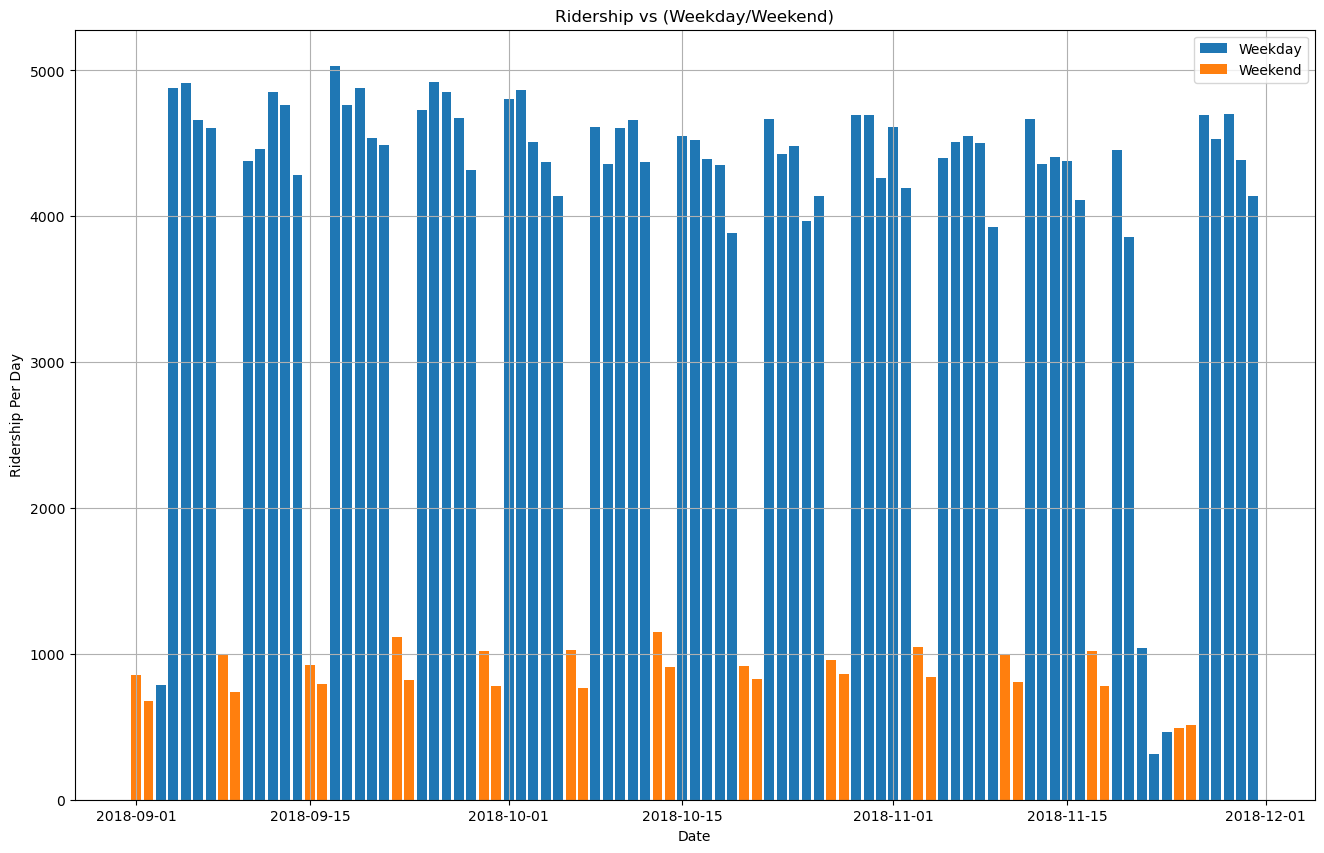

In [3]:
plt.figure(figsize=(16, 10))  

result_df_weekday=result_df[result_df["weekend"]!="weekend"]
result_df_weekend=result_df[result_df["weekend"]=="weekend"]
plt.bar(result_df_weekday['date'], result_df_weekday['ridership'],label="Weekday")
plt.bar(result_df_weekend['date'], result_df_weekend['ridership'],label="Weekend")
plt.title('Ridership vs (Weekday/Weekend)')
plt.xlabel('Date')
plt.ylabel('Ridership Per Day')
plt.legend()
plt.grid(True)
plt.show()

***
# 2) Ridership vs Temperature

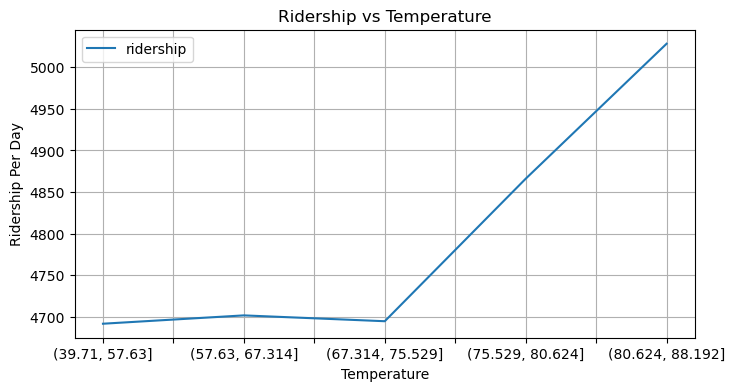

In [4]:
result_df_temp=result_df
result_df_temp["temperature_range"], total_count_bins =pd.qcut(result_df_temp["temperature"], 5, retbins=True)

result_df_temp = result_df_temp.groupby(["temperature_range"])["ridership"].agg("max")

plt.figure(figsize=(8, 4)) 
result_df_temp.plot() 
plt.title('Ridership vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Ridership Per Day')
plt.legend()
plt.grid(True)
plt.show()


***
# 3) Ridership vs Day of the Week

In [5]:
result_df_temp=result_df[["day_of_week","ridership"]].groupby(["day_of_week"])["ridership"].agg("sum").reset_index()

def day_to_weekday(day):
    weekdays = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
    return weekdays.index(day)

result_df_temp['CustomKey'] = result_df_temp["day_of_week"].map(day_to_weekday)

result_df_temp = result_df_temp.sort_values(by='CustomKey')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


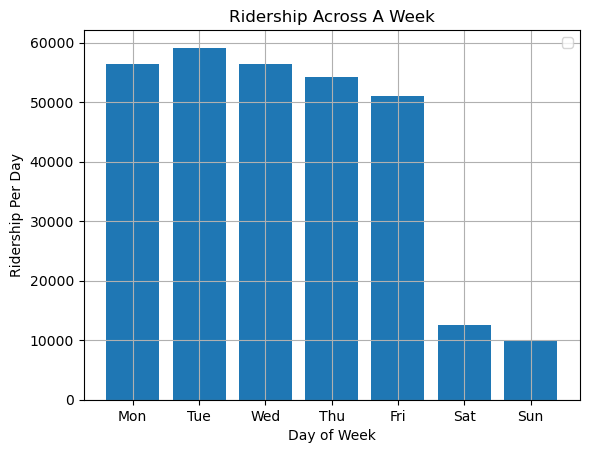

In [6]:
plt.bar(result_df_temp['day_of_week'], result_df_temp['ridership'])
plt.title('Ridership Across A Week')
plt.xlabel('Day of Week')
plt.ylabel('Ridership Per Day')
plt.legend()
plt.grid(True)
plt.show()

***
# Conclusion
By observing the graphs, we can state the following
- Ridership vs Weekday/Weekend - In this case, we see that there is a significant drop in ridership in the weekends compared to the weekdays. This is consistent throughout the Fall semester.
- Ridership vs Temperature - In this case, ridership is seen to increase as the temperature increases. So thus, during the Fall semester, as the temperature continues to drop, it would also result in a decrease in the Capitol Bus Ridership
- Ridership vs Day of Week - In this case, the ridership is more or less similar from Monday to Friday, with the maximum ridership on Tuesday and then it drops down on Saturday and Sunday.